In [1]:
"""
Dataset: 
https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data
"""
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#from google.colab import files
import warnings

warnings.filterwarnings('ignore')


In [3]:
sns.get_dataset_names()   # para obtener una lista de los datasets presentes en Seaborn

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [2]:
# cargamos dataset directo desde Seaborn
penguins = sns.load_dataset("penguins")

print(penguins.shape)
penguins.head()

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


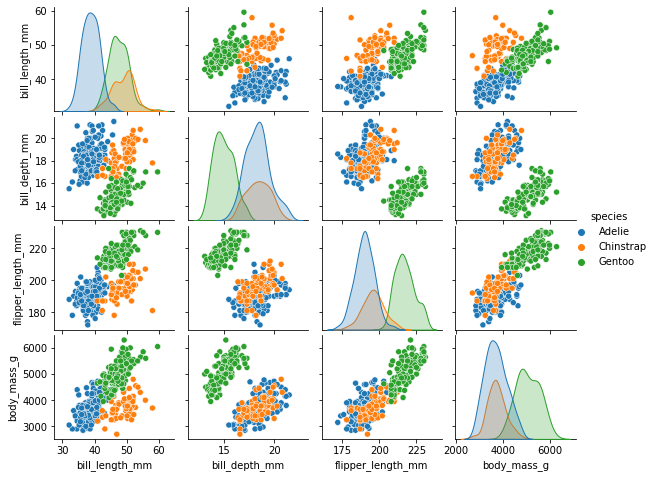

In [ ]:
pairplot_figure = sns.pairplot(penguins, hue="species")
pairplot_figure.fig.set_size_inches(9, 6.5)


In [4]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

penguins.dropna(subset=['sex'], inplace=True)
print(penguins.shape)
penguins.info()

(333, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [5]:
penguins['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [6]:
# cuántos penguins de cada especie hay?
penguins['species'].value_counts()


Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [7]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

y=penguins.pop('species')
X=pd.get_dummies(penguins, prefix_sep='-', dummy_na=False)
print(X.shape)
X.head(10)

(333, 9)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island-Biscoe,island-Dream,island-Torgersen,sex-Female,sex-Male
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,1
6,38.9,17.8,181.0,3625.0,0,0,1,1,0
7,39.2,19.6,195.0,4675.0,0,0,1,0,1
12,41.1,17.6,182.0,3200.0,0,0,1,1,0
13,38.6,21.2,191.0,3800.0,0,0,1,0,1
14,34.6,21.1,198.0,4400.0,0,0,1,0,1


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     333 non-null    float64
 1   bill_depth_mm      333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   island-Biscoe      333 non-null    uint8  
 5   island-Dream       333 non-null    uint8  
 6   island-Torgersen   333 non-null    uint8  
 7   sex-Female         333 non-null    uint8  
 8   sex-Male           333 non-null    uint8  
dtypes: float64(4), uint8(5)
memory usage: 14.6 KB


In [9]:
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

In [10]:
le=LabelEncoder()
y=le.fit_transform(y)

In [11]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 16, stratify=y)

arbol=DecisionTreeClassifier(random_state = 16)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=16)

[0.36848011 0.02461147 0.53314626 0.         0.         0.0653779
 0.         0.         0.00838426]


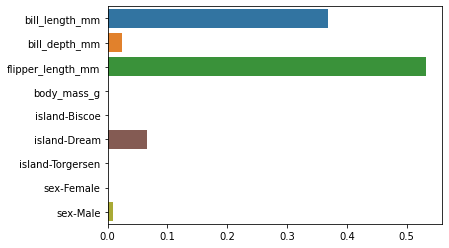

In [ ]:
print(arbol.feature_importances_)
sns.barplot(y = X_train.columns, x = arbol.feature_importances_)

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island-Biscoe', 'island-Dream', 'island-Torgersen', 'sex-Female', 'sex-Male']


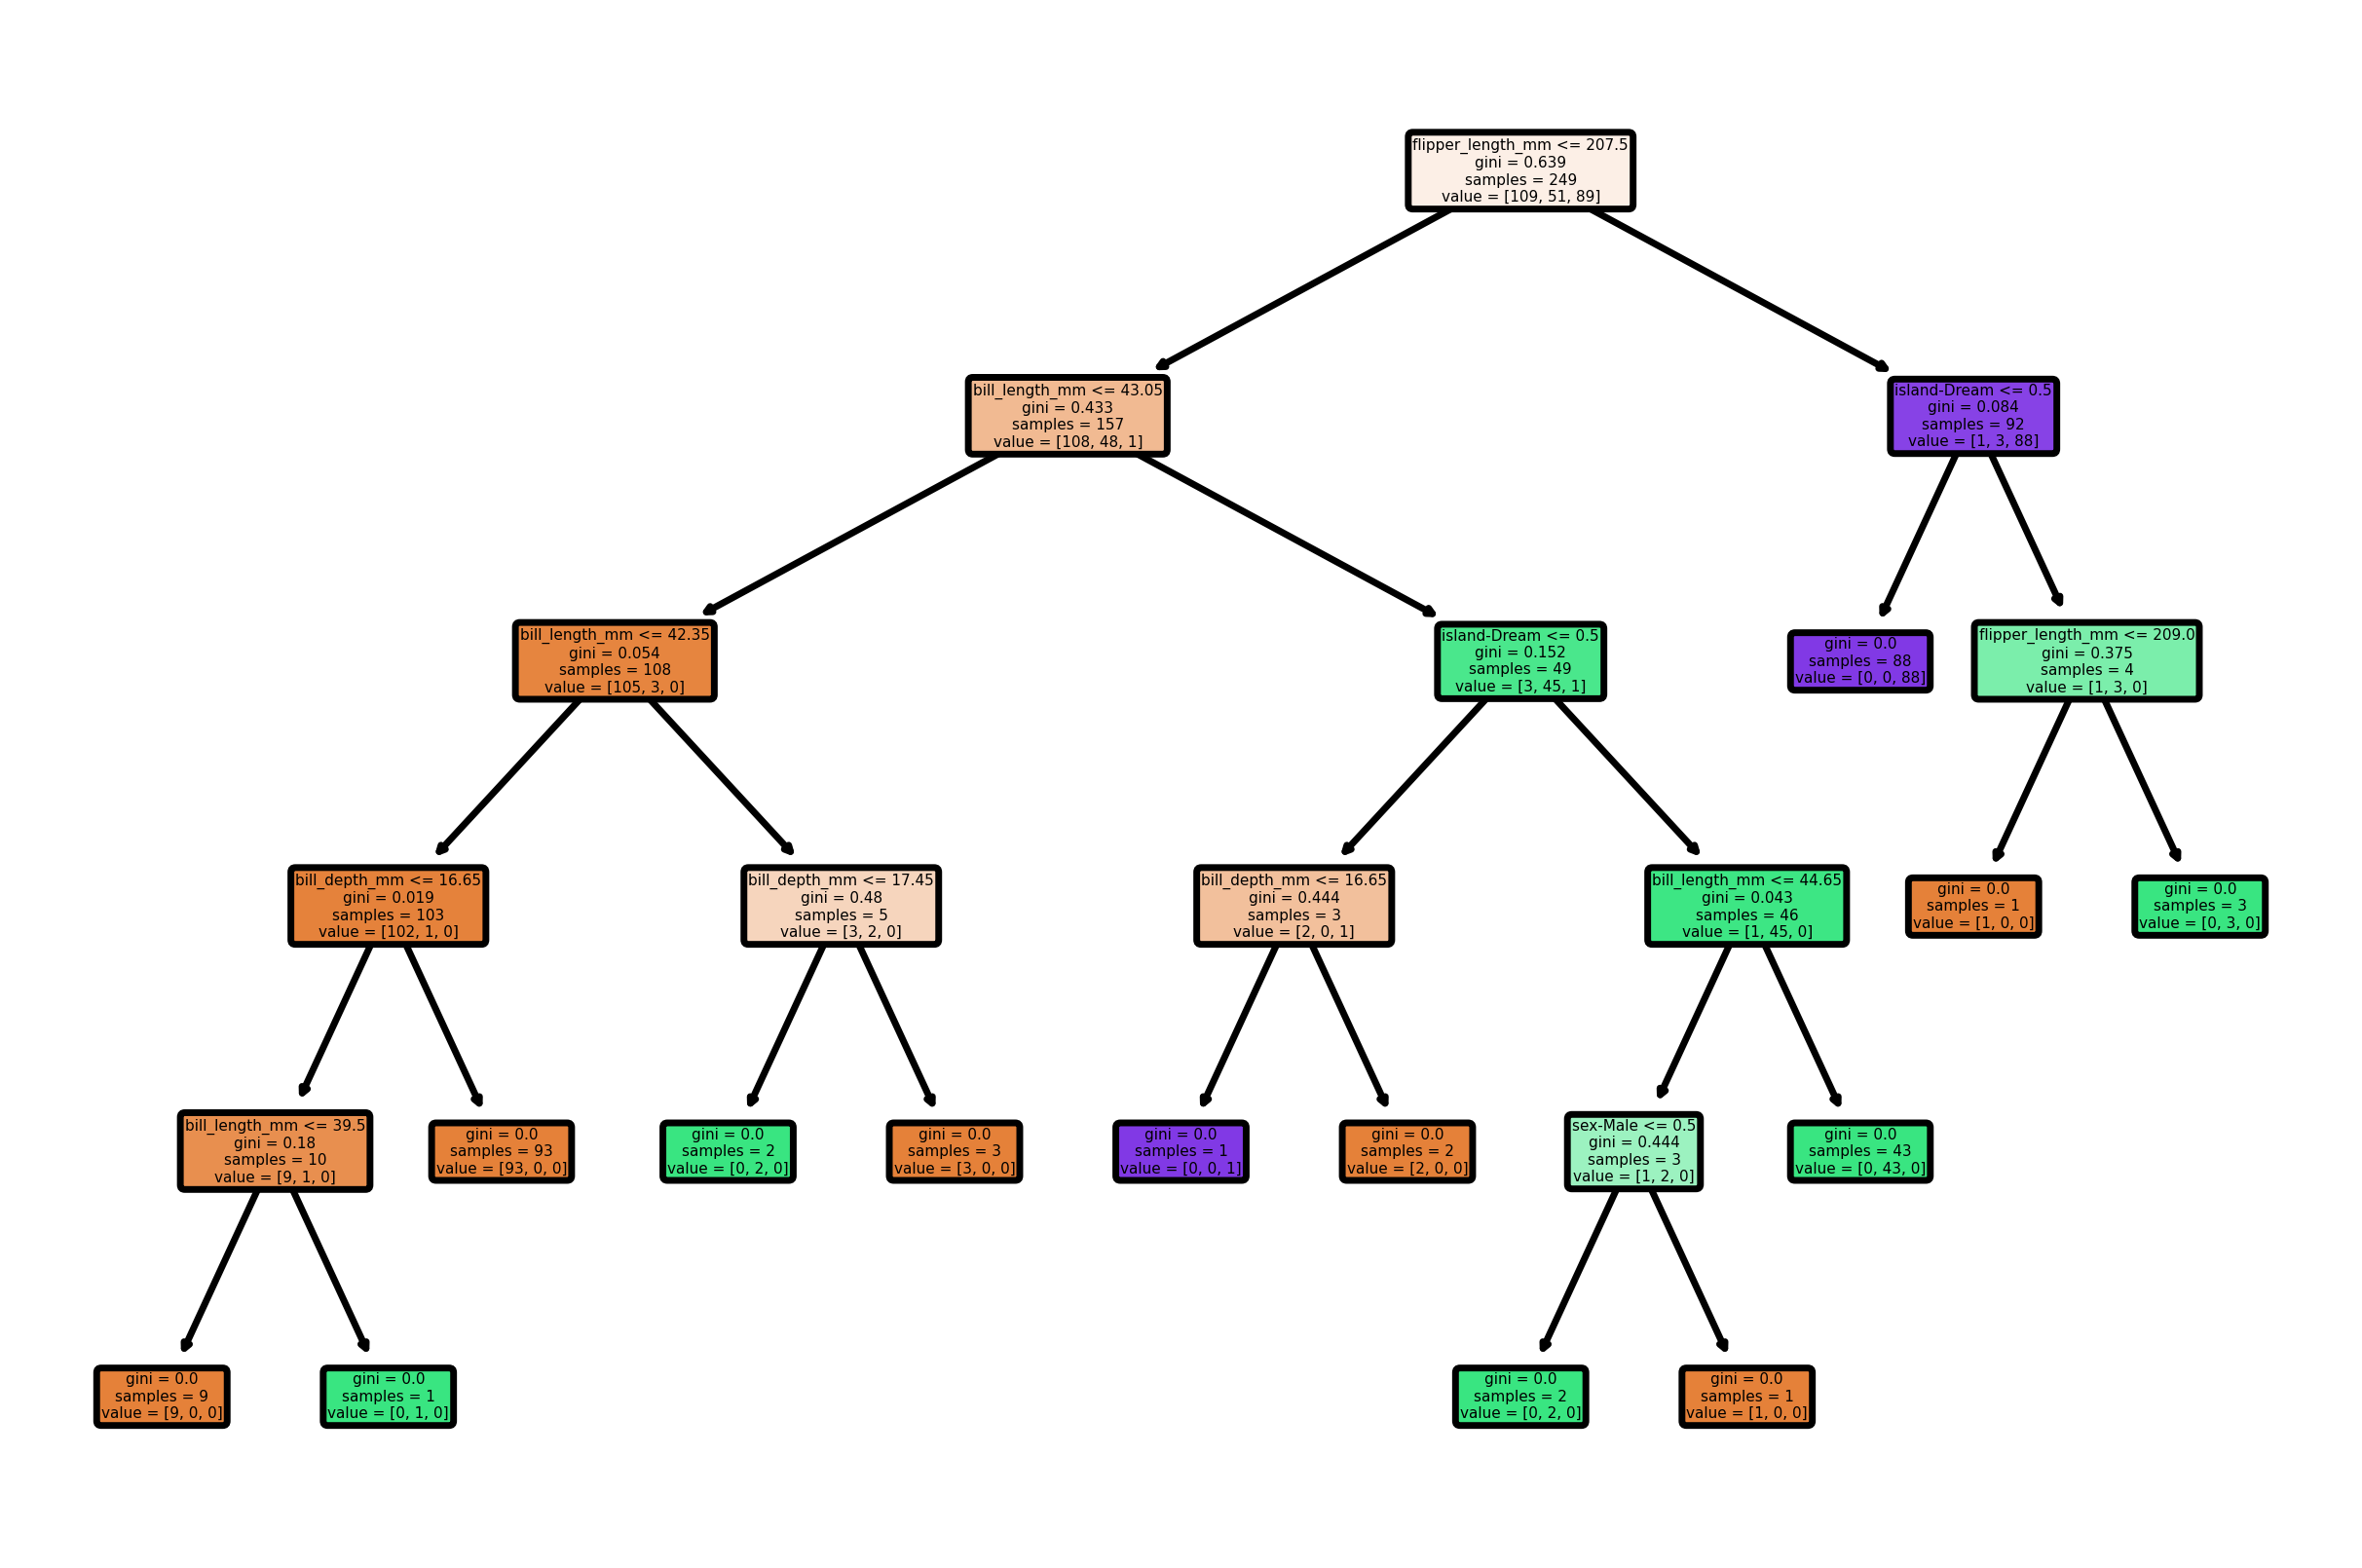

In [ ]:
lista_car=list(X.columns)
#print(lista_car)
plt.figure(dpi=500)
plot_tree(arbol, filled=True, rounded=True, feature_names=lista_car)
plt.show()
plt.close()

In [ ]:
y_pred = arbol.predict(X_test)
print('Score train: ', arbol.score(X_train, y_train))
print('Score test:  ', arbol.score(X_test, y_test))

Score train:  1.0
Score test:   0.9880952380952381


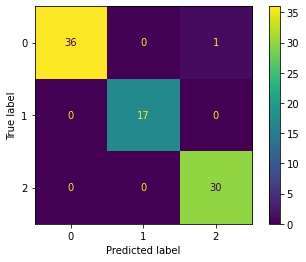

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()